# Bikeshare Rental System in Washington DC
## by Pranav Bhatnagar



### Definition
 #### Dataset:
This dataset comprises of data from Bike Sharing Company related to Bike usage over the year 2011 & 2012 in Capital bikeshare system in Washington, DC .

#### Problem Definition: 
This is a supervised learning exercise and regression or classification models can be used to solve the problem.

#### Column Attributes:
There are 730 records for each day. <br>
<b>instant:</b> record index <br>
<b>dteday :</b> date <br>
<b>season :</b> season (1 :winter, 2:spring, 3:summer, 4:fall ) <br>
<b>yr :</b> year (0: 2011, 1:2012) <br>
<b>mnth :</b> month ( 1 to 12) <br>
<b>hr : </b>hour (0 to 23) <br>
<b>holiday :</b> weather day is holiday or not  <br>
<b>weekday :</b> day of the week <br>
<b>workingday :</b> if day is neither weekend nor holiday is 1, otherwise is 0. <br>
<b>weathersit :</b> <br>
<li>1: Clear, Few clouds, Partly cloudy, Partly cloudy
<li>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
<li>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
<li>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>
<b>temp :</b>Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)<br>
<b>atemp:</b> Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) <br>
    <b>hum:</b> Normalized humidity. The values are divided to 100 (max) <br>
    <b>windspeed:</b> Normalized wind speed. The values are divided to 67 (max) <br>
    <b>casual:</b> count of casual users <br>
    <b>registered:</b> count of registered users <br>
    <b>cnt:</b> count of total rental bikes including both casual and registered

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.temp.corr(df.atemp)
# correlation ~ 1, we would not gain any significant  insight with both, hence we can drop feel_temp


0.9917015532294641

In [4]:
df.drop(['instant','yr','mnth','atemp'], axis = 1, inplace = True)

In [5]:
df.rename(columns={'dteday':'date','hum':'humidity','cnt':'total_count','weathersit':'weather_situation'},inplace = True )
df.head()

,date,season,holiday,weekday,workingday,weather_situation,temp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [6]:
df.date = pd.to_datetime(df.date)

In [7]:
#season(1:spring, 2:summer, 3:fall, 4:winter)
season_dict = {1:'winter',2:'spring',3:'summer',4:'fall'}
df.season = df.season.map(season_dict)

In [8]:
weekday_dict = {0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'}
df.weekday = df.weekday.map(weekday_dict)

In [9]:
#1: Clear, Few clouds, Partly cloudy, Partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
weather_situation_dict = {1:'clear',2:'mist',3:'light rain/snow',4:'heavy rain/snow'}
df.weather_situation = df.weather_situation.map(weather_situation_dict)

In [10]:
#changing datatypes from object to categorical
df.season = df.season.astype('category')
df.holiday = df.holiday.astype('category')
df.weekday = df.weekday.astype('category')
df.workingday = df.workingday.astype('category')
df.weather_situation = df.weather_situation.astype('category')
df.sample(10)

,date,season,holiday,weekday,workingday,weather_situation,temp,humidity,windspeed,casual,registered,total_count
177,2011-06-27,summer,0,monday,1,mist,0.682500,0.658333,0.107588,854,3854,4708
679,2012-11-10,fall,0,saturday,0,clear,0.389167,0.645417,0.057846,2090,4446,6536
241,2011-08-30,summer,0,tuesday,1,clear,0.639167,0.548333,0.125008,775,4429,5204
33,2011-02-03,winter,0,thursday,1,clear,0.186957,0.437826,0.277752,61,1489,1550
671,2012-11-02,fall,0,friday,1,clear,0.355000,0.522083,0.266175,618,5229,5847
192,2011-07-12,summer,0,tuesday,1,clear,0.794167,0.559167,0.200254,662,3596,4258
717,2012-12-18,fall,0,tuesday,1,clear,0.410833,0.666250,0.221404,433,5124,5557
182,2011-07-02,summer,0,saturday,0,clear,0.738333,0.444583,0.115062,2204,2915,5119
658,2012-10-20,fall,0,saturday,0,clear,0.484167,0.572917,0.117537,2806,5284,8090
119,2011-04-30,spring,0,saturday,0,clear,0.472500,0.503333,0.235075,1965,3347,5312


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
date                 731 non-null datetime64[ns]
season               731 non-null category
holiday              731 non-null category
weekday              731 non-null category
workingday           731 non-null category
weather_situation    731 non-null category
temp                 731 non-null float64
humidity             731 non-null float64
windspeed            731 non-null float64
casual               731 non-null int64
registered           731 non-null int64
total_count          731 non-null int64
dtypes: category(5), datetime64[ns](1), float64(3), int64(3)
memory usage: 44.5 KB


In [12]:
df.describe()
#temp, humidity and windspeed are normalized, and do not require any fixing.

,temp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
def graph_labels(xaxis,yaxis,title):
    '''
    this function is used to provide the graph with an appropriate title, x and y axis labels. 
    '''
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)

### What is the structure of your dataset?

There are 731 records for two years each day (clean dataframe). There are 13 relevant columns we will study in detail. <br>
The attributes are:<br>
DateType: 'date' <br>
Qualitative: 'season', 'holiday', 'weekday', 'workingday', 'weathersit' <br>
Quantitative: 'temp', 'humidity', 'windspeed', 'casual', 'registered','total_count'. <br>

### What is/are the main feature(s) of interest in your dataset?

I will be interested in figuring out what attributes contribute towards the total_count of bike users.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Seasons, holiday, weekday, working day, weather patterns, temperature, humidity and windspeed are attributes will be used in investigating our feature of interest. 

## Univariate Exploration

We will start investigating with the dependent/predicting variable total_count. 

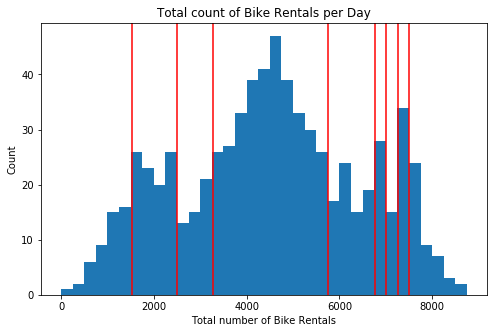

In [14]:
#histogram for total number of bike rentals
binsize = 250
bins = np.arange(0, df['total_count'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'total_count', bins = bins)
graph_labels('Total number of Bike Rentals','Count', 'Total count of Bike Rentals per Day')

plt.axvline(x=1530, color='r')
plt.axvline(x=2500, color='r')
plt.axvline(x=3275, color='r')
plt.axvline(x=5750, color='r')
plt.axvline(x=6770,color='r')
plt.axvline(x=7000,color='r')
plt.axvline(x=7270,color='r')
plt.axvline(x=7500,color='r')
plt.show()

The distribution for the total count of bike rentals in Washington DC has a similar to a normal distribution. On an average day, there were around 3.2k-5.75K bikes rented with the mean equaling 4504 bike rentals each day. There were also many times with high number of bike rentals (1.55K-2.5K, 6.8K-7K and 7.27K-7.5K). We will go over some statistics and study for outliers. This will be followed by the distribution of casual bike rentals.

In [15]:
#x is the mean, y is standard deviation
x = df.total_count.mean()
y = df.total_count.std()
print(x-y,x+y)
print(x)

2567.137385590535 6441.56028882807
4504.3488372093025


In [16]:
#checking for outliers, less rentals due to bad weather
df_test_count = df.loc[df.total_count<=200]
df_test_count.head()

,date,season,holiday,weekday,workingday,weather_situation,temp,humidity,windspeed,casual,registered,total_count
667,2012-10-29,fall,0,monday,1,light rain/snow,0.44,0.88,0.3582,2,20,22


In [17]:
#also checking for outliers, high rentals due to great weather conditions. 
df_test_count = df.loc[df.total_count>=8500]
df_test_count.head()

,date,season,holiday,weekday,workingday,weather_situation,temp,humidity,windspeed,casual,registered,total_count
623,2012-09-15,summer,0,saturday,0,clear,0.608333,0.501667,0.247521,3160,5554,8714
637,2012-09-29,fall,0,saturday,0,clear,0.542500,0.542917,0.227604,2589,5966,8555


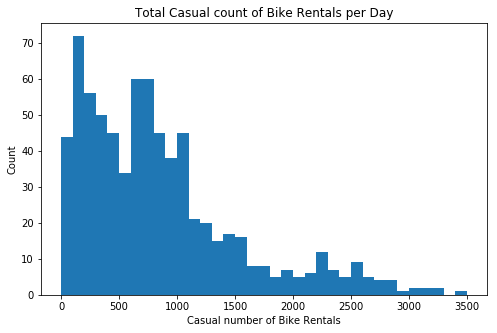

In [18]:
#histogram for bike rentals for casual users
binsize = 100
bins = np.arange(0, df['casual'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'casual', bins = bins)
graph_labels('Casual number of Bike Rentals','Count', 'Total Casual count of Bike Rentals per Day')
plt.show()


In [19]:
print(np.percentile(df['casual'],80))

1263.0


The number of casual bike rentals has a right skew distribution. The majority number of rentals(80%) lie within 1263 per day. This may be because of seasons, weather patterns, holidays etc for the non-registered users. We will learn about this later in the analysis using more variables. Next, we will investigate about the registered users. 

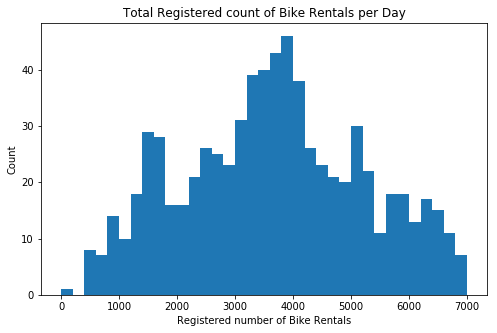

In [20]:
#histogram for bike rentals for registered users
binsize = 200
bins = np.arange(0, df['registered'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'registered', bins = bins)
graph_labels('Registered number of Bike Rentals','Count', 'Total Registered count of Bike Rentals per Day')
plt.show()

The registered user count of bike rental is very similar to the total count distribution, and is close to a normal distribution. This is in contrast to the casual users, as registered users are more comitted to renting bikes. Around 3K-4.5K bikes are rented at an average. Next we will investigate a categorical attribute: weather_situation

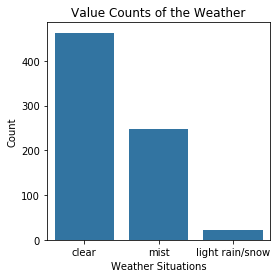

In [21]:
#countplot for all kinds of weather situations we will be studying in the analysis
fig, ax = plt.subplots(figsize = [4,4])

default_color = sb.color_palette()[0]
order = df.weather_situation.value_counts().index
sb.countplot(data = df, x = 'weather_situation', color = default_color, order = order)
graph_labels('Weather Situations','Count', 'Value Counts of the Weather')

plt.show()


Around 460 days in the two years, the weather was clear and with few clouds. While 245 days there was mist and few clouds. On the other hand there were roughly 20 days with light snow or light rain with thunderstorm. There weren't any days of heavy rain or snow which would lead to no bike rentals for the day. We will go over the final three quantitative variables. 

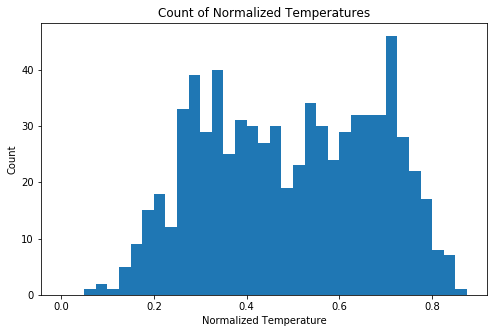

In [22]:
#histogram showing the distribution of temperature
binsize = .025
bins = np.arange(0, df['temp'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'temp', bins = bins)
graph_labels('Normalized Temperature','Count', 'Count of Normalized Temperatures')

plt.show()

As the graph labels suggests, the aim for the distribution of temperature was to make it close to normal. The values are calculated using the formula: (T-Tmin/Tmax-Tmin). This looks like multimodal distribution with many low and high counts of temperature. 

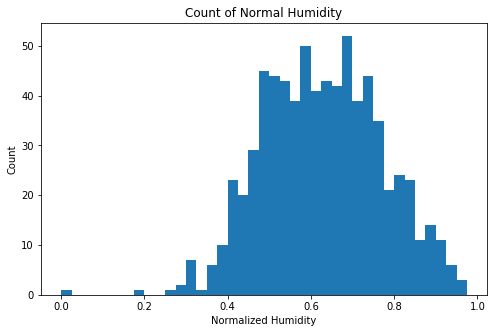

In [23]:
#histogram showing the distribution of humidity
binsize = .025
bins = np.arange(0, df['humidity'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'humidity', bins = bins)
graph_labels('Normalized Humidity','Count', 'Count of Normal Humidity')

plt.show()

As the graph labels suggest, the aim for the distribution of humidity was to make it close to normal. The values are calculated using the formula similar to the temperature: (H-Hmin/Hmax-Hmin). This is normal distribution with most the values of normalized humidity lying between 0.4 - 0.9.

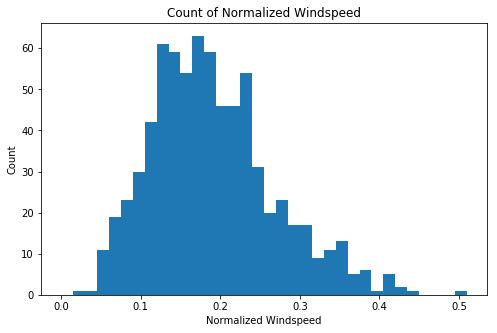

In [24]:
#histogram showing the distribution of windspeed
binsize = .015
bins = np.arange(0, df['windspeed'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'windspeed', bins = bins)
graph_labels('Normalized Windspeed','Count', 'Count of Normalized Windspeed')

plt.show()

As the graph labels suggest, the aim for the distribution of windspeed was to make it close to normal. The values are calculated using the formula used above: (W-Wmin/Wmax-Wmin). This is normal distribution with most the values of normalized windspeed lying between 0.04 - 0.35.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The total count of registered and casual bike rentals has a very similar distribution to normal. There weren't any transformations required in this scenario. Also, we investigated for any outliers/leverage points. But fortunately, the end points were very much valid points. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

We already had normalized temperature, humidity and windspeed. The distributions looked completely usual on further visual and programmatic assessment. Tried using log scale and transformations, but we already have good distributions. 
The number of casual bike rentals has a right skew distribution while the total/registered rentals had more of a normal distribution. This can be answered from our further in depth analysis.

## Bivariate Exploration


In [25]:
#creating numeric and categorical list
numeric_vars = ['temp', 'humidity', 'windspeed', 'casual', 'registered','total_count']
cat_vars = ['season', 'holiday', 'weekday', 'workingday', 'weather_situation']

We will start observing heat maps and scatter plots between the numeric variables. 

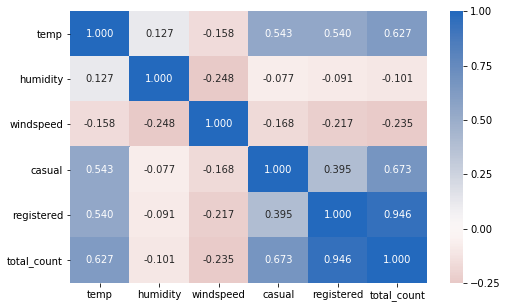

In [26]:
# correlation plot for all numeric variables
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

This correlation plot shows us relationships between the numeric fields. The total count, registered and casual users are directly related. This seems pretty obvious as casual + registered = total_count. And total_count is depended on the former two. There is a slight positive correlation of total count of bike rentals with temperature. We will study about these in detail later in this bivariate exploration. 

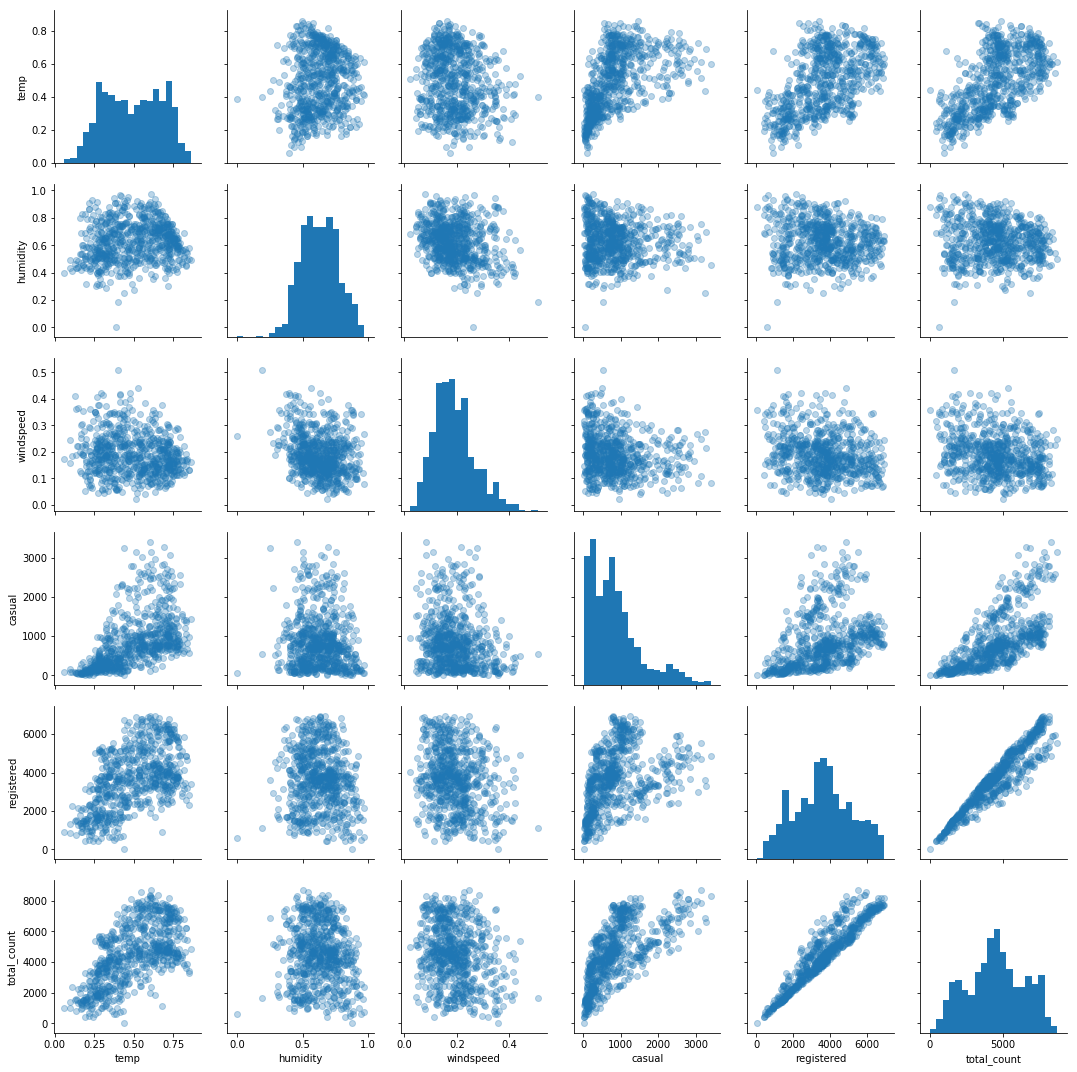

In [27]:
#scatterplot, histograms for all numeric variables, histogram
g = sb.PairGrid(data = df, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha = .3)

The scatter matrix is just a visual representation of the heatmap above. Next, I will go over the important scatter matrix relationships. 

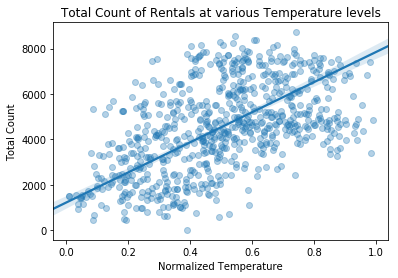

In [28]:
#scatter plot between total counts of rental and temperature
sb.regplot(data = df, x = 'temp', y = 'total_count', scatter_kws = {'alpha':1/3},  x_jitter =.2)
graph_labels('Normalized Temperature','Total Count', 'Total Count of Rentals at various Temperature levels')


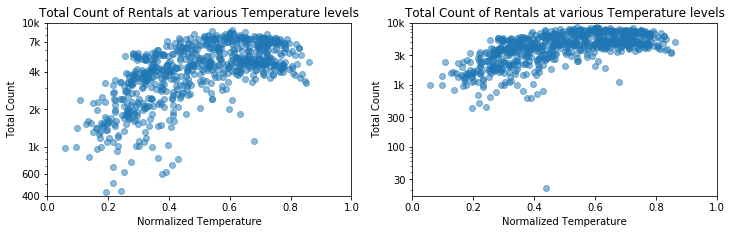

In [29]:
#same scatter plot using log as yscale, and using different yticks
plt.figure(figsize = [12, 7])
plt.subplot(2,2,1)
plt.scatter(data = df, x = 'temp', y = 'total_count' , alpha = 1/2 );
plt.yscale('log')
graph_labels('Normalized Temperature','Total Count', 'Total Count of Rentals at various Temperature levels')
plt.xlim(0,1)
plt.ylim(400,10000)
plt.yticks([400,600, 1000, 2000, 4000, 7000, 1e4], [400,600, '1k', '2k', '4k', '7k', '10k']);

plt.subplot(2,2,2)
plt.scatter(data = df, x = 'temp', y = 'total_count' , alpha = 1/2 );
plt.yscale('log')
graph_labels('Normalized Temperature','Total Count', 'Total Count of Rentals at various Temperature levels')
plt.xlim(0,1)
plt.ylim(0,10000)
plt.yticks([30, 100, 300, 1e3, 3e3, 1e4], [30, 100, 300, '1k', '3k', '10k']);


There is an inital relationship between normalized temperature and total count of bike rental. As the temperature increases from 0.2 to 0.4, the rental total count also increases. After reaching 0.4, there is no definite relationship between the parameters, and it is a straight line parellel to the x axis. The scale on y axis is logarithmic. Moreover, the figure on the right is a more zoomed out version which shows the relationship to be direct uptil 0.4 and stagnant after. Also the volume of bike rentals increase drastically after 0.2.

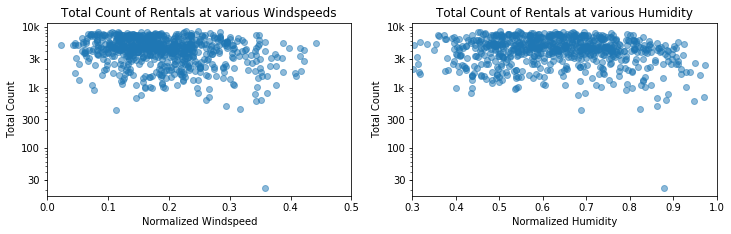

In [30]:
#scatter plot between total count of rentals with the windspeed
plt.figure(figsize = [12, 7])

plt.subplot(2,2,1)
plt.scatter(data = df, x = 'windspeed', y = 'total_count' , alpha = 1/2 )
plt.yscale('log')
graph_labels('Normalized Windspeed','Total Count', 'Total Count of Rentals at various Windspeeds')
plt.xlim(0,.5)
plt.yticks([30, 100, 300, 1e3, 3e3, 1e4], [30, 100, 300, '1k', '3k', '10k'])

#scatter plot between total count of rentals with the humidity
plt.subplot(2,2,2)
plt.scatter(data = df, x = 'humidity', y = 'total_count' , alpha = 1/2 )
graph_labels('Normalized Humidity','Total Count', 'Total Count of Rentals at various Humidity')
plt.yscale('log')
plt.xlim(0.3,1)
plt.yticks([30, 100, 300, 1e3, 3e3, 1e4], [30, 100, 300, '1k', '3k', '10k']);


Total number of rentals decreases with increase in the windspeed. Humidity did not show any direct relation with the total count of bike rentals. Next, we will cover visualizations of boxplot of total count with the various categorical attributes.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


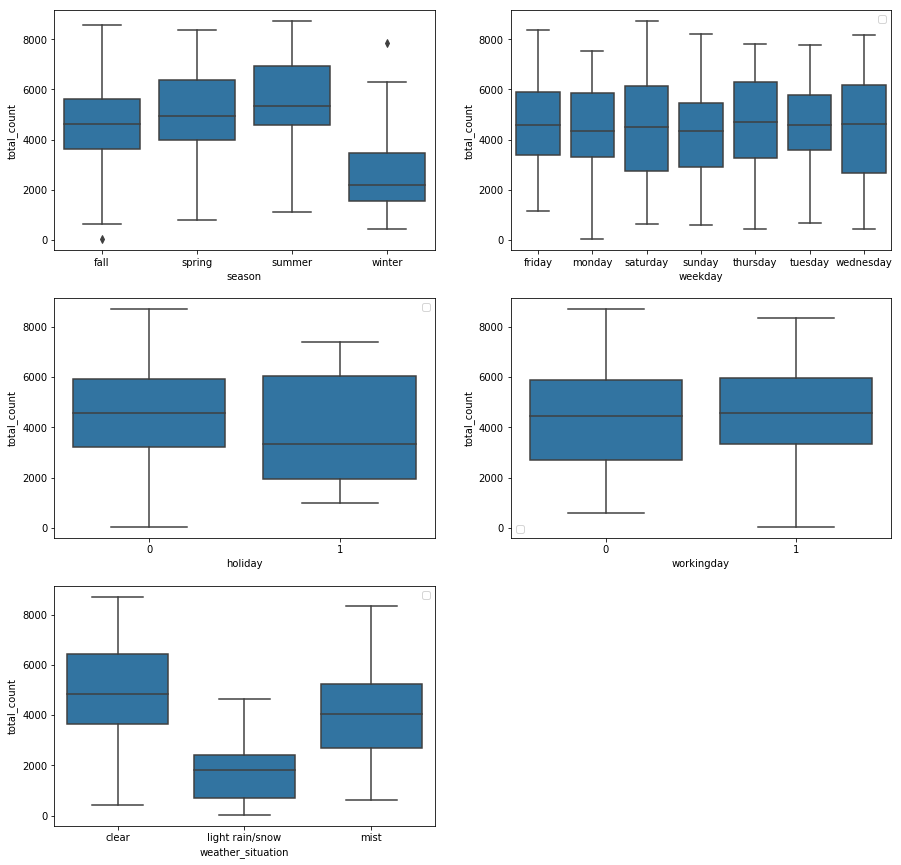

In [31]:
#box plot of total count with all categorical attributes
plt.figure(figsize = [15, 15])
color = sb.color_palette()[0]
# subplot 1: total_count v season
plt.subplot(3, 2, 1)
sb.boxplot(data = df, x = 'season', y = 'total_count', color = color)

# subplot 2: total_count v weekday
ax = plt.subplot(3, 2, 2)
sb.boxplot(data = df, x = 'weekday', y = 'total_count', color = color)
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: total_count v holiday
ax = plt.subplot(3, 2, 3)
sb.boxplot(data = df, x = 'holiday', y = 'total_count', color = color)
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 4: total_count v workingday
ax = plt.subplot(3, 2, 4)
sb.boxplot(data = df, x = 'workingday', y = 'total_count', color = color)
ax.legend(loc = 3, ncol = 2) # re-arrange legend to remove overlapping

# subplot 5: total_count v weather_situation
ax = plt.subplot(3, 2, 5)
sb.boxplot(data = df, x = 'weather_situation', y = 'total_count', color = color)
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.show()

The above box plot gives an understanding of various categorical attributes when pitted against total counts of bike rentals. 
The following can be inferred:
<li> The most bike rentals happen in the season of Summer.
<li> The least rentals happen in Winter.
<li> Summer is closely followed by Spring and Fall in terms of total bike rentals.
<li> Surprisingly, there is no definite relationship between the days of the week and total rental count. My inital thoughts were that Saturday and Sunday might have more rentals compared to rest of the week. But this assumption seems incorrect for now. 
<li> Holiday or Working Day also don't make much of an impact.
<li> Finally, it can be concluded that bike rentals is the least during rain, snow or thunderstorms. The count is significantly higher for clear skies. 
    
 Next, we will focus on the histograms for total counts for season, holiday and weather count. 

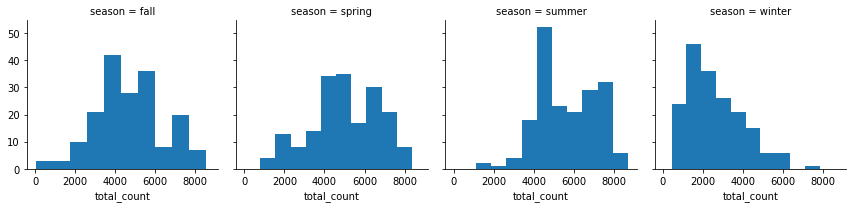

In [32]:
#total counts of bike rentals for each season
g = sb.FacetGrid(data = df, col = 'season')
g.map(plt.hist, 'total_count')

Fall, Spring and Summer have close to normal distribution. This indicates, users don't differentiate on the basis of the season if its fall, spring and summer. Winter is an exception. The number of total bike rentals goes down in Winter. Therefore, we see a right skewed distribution. We shall look into total counts for a holiday or not.

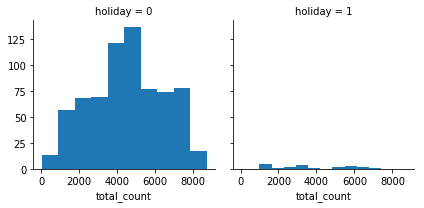

In [33]:
#total counts of bike rentals for holiday
g = sb.FacetGrid(data = df, col = 'holiday')
g.map(plt.hist, 'total_count')

For a holiday, there are very few instances. We can't really infer much from the holidays. But for non holidays, the total count has a normal distribution. We will now investigate the count with the weather situation. 

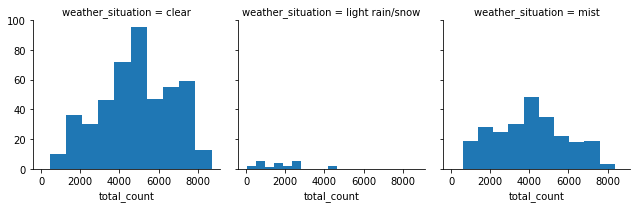

In [34]:
#total counts of bike rentals for each weather situation
g = sb.FacetGrid(data = df, col = 'weather_situation')
g.map(plt.hist, 'total_count')

Very similar to normal distribution behavior can be seen in clear and misty conditons. We see a very small amount of rentals on the day of light snow or rain. Clear skies attract the bike users the most. Finally, we will plot time series for total count, registered and casual users. 

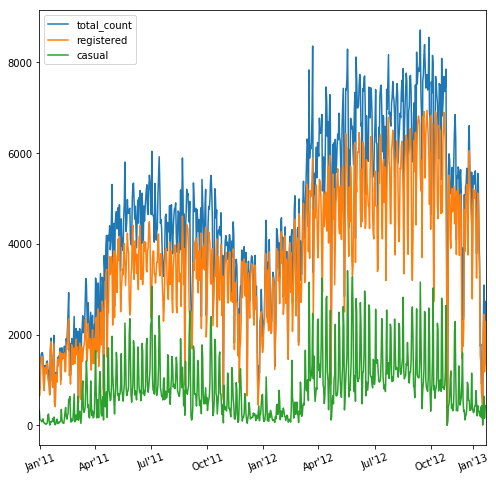

In [35]:
#timeseries graph of month/year on x-axis and total count, registered and casual rentals on y-axis.
plt.figure(figsize = [8, 8])
df_new = df[['date','total_count','registered','casual']]
df_new.set_index('date')
df_new['total_count'].plot(linewidth=1.5);
df_new['registered'].plot(linewidth=1.5);
df_new['casual'].plot(linewidth=1.5);
ticks = [1,91,183,275,366,456,549,640,710]
labels = ['Jan\'11','Apr\'11','Jul\'11','Oct\'11','Jan\'12','Apr\'12','Jul\'12','Oct\'12','Jan\'13']
plt.xticks(ticks, labels, rotation = 20)
plt.legend()

This graph is a great visualiztion in order to see which months are the busiest in terms of bike rentals. There is a slight increase in the count from April through Septmeber for both the years 2011,2012. Also there is an increase in the bike rental in the two years. For example, April 2012 has more rentals than April 2011. 
It can also be concluded that registered users are significantly higher than the casual users. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The dependent/response variable 'total count of rentals' has direct relation with temperature till .4. The number of bike rentals decrease with increase in windspeed. There is a high volume of count for low to average levels of windspeed. Humidity did not show any direct relation with the total count of bike rentals. The days of the week did not seem like a contributing factor towards the total count. While variables like season and weather situation seem to have a relationship with the total count. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
The registered users are generally more than the casual users throughout the two years. There is a slight positive correlation of the temperature with the registered and casual bike rentals. This does indicate that with low temperature,the number of registered and casual bike rentals go down. Moroever, this can be seen in the time series line plot of registered and casual bike rentals. Moreover, there is no relationship between temperature, humidity and windspeed as seen from the heatmap. 

## Multivariate Exploration

We will investigate the casual with the registered rentals relationship in different seasons, holidays, weekdays and weather situations. We will start off with how the seasonality plays a role in their relationship.

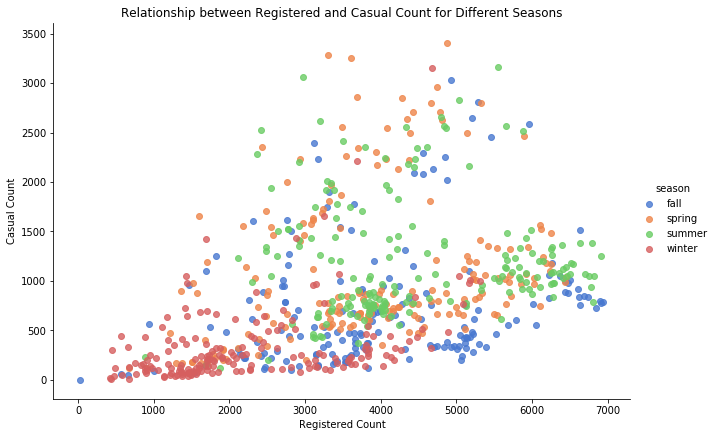

In [36]:
#Using a FacetGrid to plot between registered and casual rentals for different seasons.
g = sb.FacetGrid(data=df, hue ='season', palette = 'muted',height = 6,aspect = 1.5)
g.map(sb.regplot,'registered','casual', fit_reg = False)
g.add_legend()
graph_labels('Registered Count','Casual Count', 'Relationship between Registered and Casual Count for Different Seasons')

The graph depicts how the seasons effect the casual and registered bike rentals. In Winter, the left bottom region of the graph indicated a low number of registered and casual bike rentals. In fall there are definitely a much higher number of registered than casual bike rentals. For spring and summer, it is very hard to distinguish as both casual and registered count pattern is very similar. Next we shall investigate the two quantitative variables with working day. 

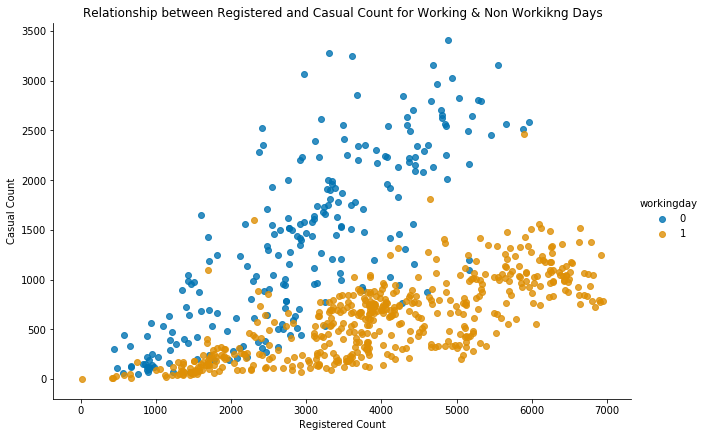

In [37]:
#Using a FacetGrid to plot between registered and casual rentals for when its a working day or not. 

g = sb.FacetGrid(data=df, hue ='workingday', palette = 'colorblind',height = 6,aspect = 1.5)
g.map(sb.regplot,'registered','casual', fit_reg = False)
g.add_legend()
graph_labels('Registered Count','Casual Count', 'Relationship between Registered and Casual Count for Working & Non Workikng Days')

As expcted, the number of casual bike rentals are higher for a non-working day. While registered bike rental number is much higher for working days. We shall investigate deep into the days of the week.

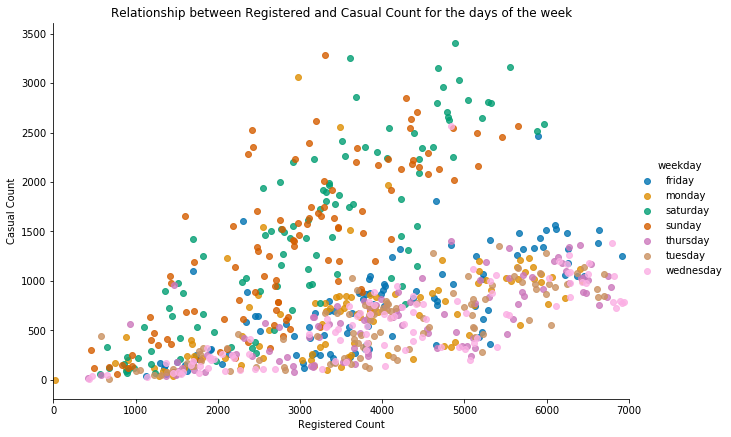

In [38]:
#Using a FacetGrid to plot between registered and casual rentals for different days of the week.

g = sb.FacetGrid(data=df, hue ='weekday', palette = 'colorblind',height = 6,aspect = 1.5)


g.map(sb.regplot,'registered', 'casual',fit_reg = False)
plt.xlim(0,7000)
#plt.ylim(0,7000)
g.add_legend()
graph_labels('Registered Count','Casual Count', 'Relationship between Registered and Casual Count for the days of the week')

The casual bike rental count is definitely much higher for Saturdays and Sundays. Fridays casual bike rental number is above the rest of the weekdays. The registered user count for weekend is significantly low, and they prefer biking on weekdays which is indicated in this graph. Finally, we will shift our focus towards the weather conditions. 

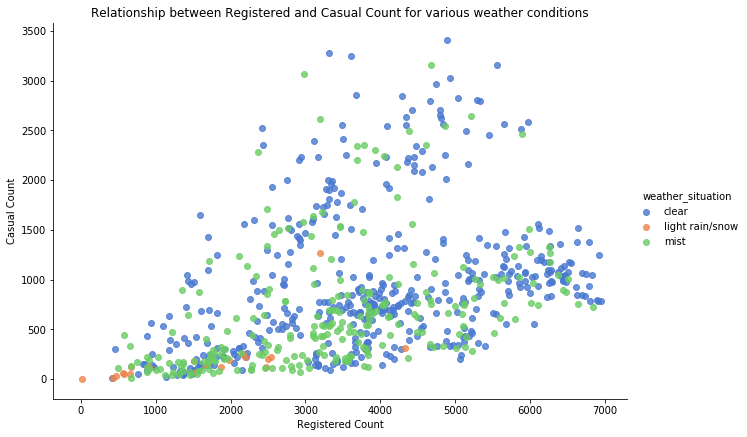

In [39]:
#Using a FacetGrid to plot between registered and casual rentals for various weather conditions.

g = sb.FacetGrid(data=df, hue ='weather_situation', palette = 'muted',height = 6,aspect = 1.5)
g.map(sb.regplot,'registered','casual', fit_reg = False)
g.add_legend()
graph_labels('Registered Count','Casual Count', 'Relationship between Registered and Casual Count for various weather conditions')

The massive amount of bike rentals for both registered and casual is done with clear sky conditons with less clouds. There are much more registered rentals on misty days than casual bike rentals. And as already seen before, very few number of both registered and casual (mostly registered) rentals happen on rainy/snowy days. We will investigate some more of multivariate graphs.

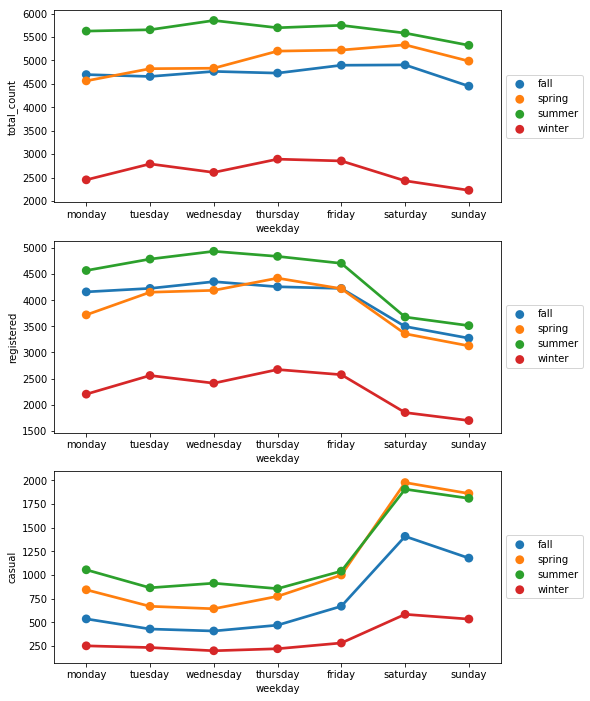

In [40]:
#subplots showing relationship between weekdays and count(registered, casual and total) in different seasons
plt.figure(figsize = [8, 12])
order = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
plt.subplot(3, 1, 1)
g = sb.pointplot(data = df,x ='weekday',y ='total_count',hue = 'season', order = order, ci = None)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.subplot(3, 1, 2)
g = sb.pointplot(data = df,x ='weekday',y ='registered',hue = 'season', order = order, ci = None)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.subplot(3, 1, 3)
g = sb.pointplot(data = df,x ='weekday',y ='casual',hue = 'season', order = order, ci = None)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)


As previously seen winter recieves the lowest number of casual and registered bike rentals irrespective of the day of the week. The second graph shows how the registered bike rentals decrease on the weekends, while there is a significant rise in casual bike rentals over the weekend specially on a Saturday. The total count remains constant as weekdays there is heavy traffic of registered users, while casuals compensates on the the weekends. Summer is the most busy season followed closely by spring for casual bike rentals. Registered bike rentals prefer fall over summer as their second choice of season. Next we will look into the weather situations for the days of the week in terms of registered and casual bike rentals.

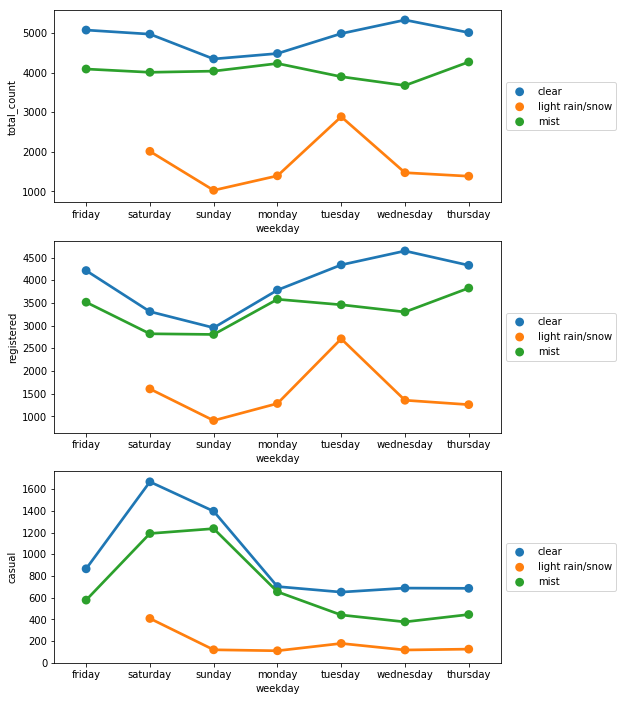

In [41]:
#subplots showing relationship between weekdays and count(registered, casual and total) in different seasons
plt.figure(figsize = [8, 12])
order = ['friday','saturday','sunday','monday','tuesday','wednesday','thursday']

plt.subplot(3, 1, 1)
g = sb.pointplot(data = df,x ='weekday',y ='total_count',hue = 'weather_situation', order = order, ci = None)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.subplot(3, 1, 2)
g = sb.pointplot(data = df,x ='weekday',y ='registered',hue = 'weather_situation', order = order, ci = None)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.subplot(3, 1, 3)
g = sb.pointplot(data = df,x ='weekday',y ='casual',hue = 'weather_situation', order = order, ci = None)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

As previously seen with adverse weather conditions, there will be very less number of rentals both in the registered and casual domain. Both clear and misty conditions lead to high amount of bike rentals. The registered rentals on clear days increase alot on Tuesdays, Wednesdays and Thursdays, with minimal change in casual rentals which only draw attention on weekends. Next we will drag our attention towards the working days and holidays when it comes to different seasons. 

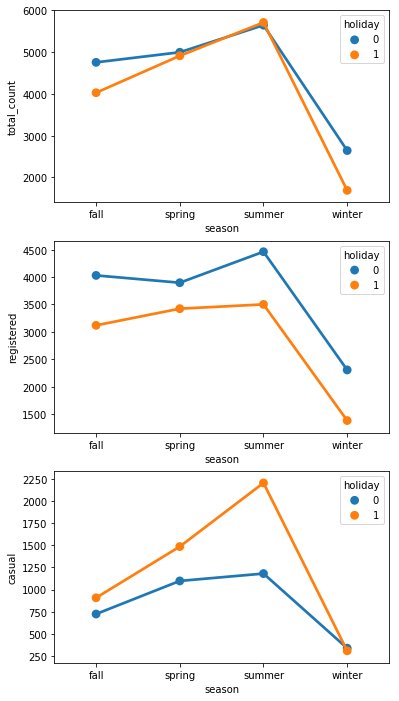

In [42]:
#subplots showing relationship between seasons and count(registered, casual and total) for whether its a holiday or not

plt.figure(figsize = [6, 12])
plt.subplot(3, 1, 1)
sb.pointplot(data = df,x ='season',y ='total_count',hue = 'holiday', ci = None)

plt.subplot(3, 1, 2)
sb.pointplot(data = df,x ='season',y ='registered',hue = 'holiday', ci = None)

plt.subplot(3, 1, 3)
sb.pointplot(data = df,x ='season',y ='casual',hue = 'holiday', ci = None)

It is observed that casual bike rentals go high during holidays specially during the summer. The casual bike rentals definitely decrease in the fall and winter due to the cold. On the other hand, the registered bike rentals prefer non-holidays to bike. They don't mind the season other than Winter. They almost equally prefer fall, spring and summer. Due to the difference in opinion of casual and registerd bike rentals, the total amount of bike rentals remains consistent throughout with the exception of Winter offcourse. Finally we will go over a simialar anaylsis but with working day instead of a holiday.

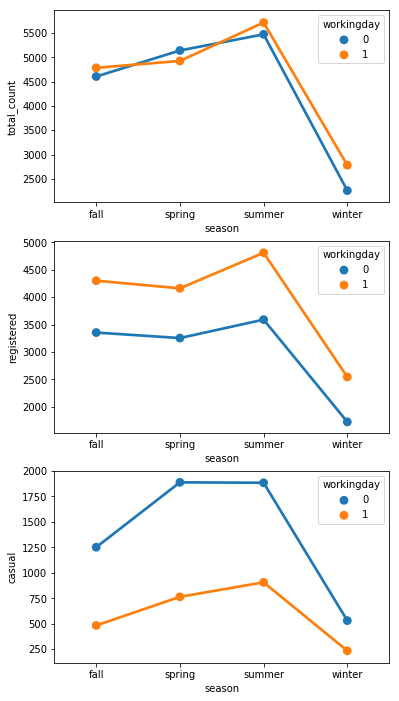

In [44]:
#subplots showing relationship between seasons and count(registered, casual and total) for whether its a workingday or not

plt.figure(figsize = [6, 12])
plt.subplot(3, 1, 1)
sb.pointplot(data = df,x ='season',y ='total_count',hue = 'workingday', ci = None)

plt.subplot(3, 1, 2)
sb.pointplot(data = df,x ='season',y ='registered',hue = 'workingday', ci = None)

plt.subplot(3, 1, 3)
sb.pointplot(data = df,x ='season',y ='casual',hue = 'workingday', ci = None)

It is observed that casual bike rentals go lower during working days. The fall rentals decrease to rates similar but slightly higher than the winter renting numbers. The difference between the fall, spring and summer is minimal. On the other hand, the registered bike rentals prefer workindays to bike. They don't mind the season other than Winter. They almost equally prefer fall, spring with summer being their top favorite as well. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
We have established a relationship between total count of rentals with different seasons for different days of the week.  The summer season is the favorite month for both registered and casual bike renters. Moreover, they also prefer clear skies to very less clouds, and considers that ideal conditions for biking.

### Were there any interesting or surprising interactions between features?
The weekends and holidays are preferred by the casual bike rentals. While it is observed that registered users prefer all three seasons fall, summer or spring for renting. They are more inclined towards weekdays and non-holidays to avoid the traffic of causal bike renters.  